# Assignment 2


Students: Clara Louise Brodt (s224189) & Celina Laungaard (s234809)

Course: Social Computational Science (02467)
GitHub link: https://github.com/claralb2002/Social-Computational-Science-Assignment-1.git 

(Link is correct, look in folder "Assignment 2")

| Contribution| Celina | Clara |
| --- | --- | --- |
| Part 1 | 50% | 50% |
| Part 2 | 50% |50% |
| Part 3 | 50% | 50% |
| Part 4 | 50% |50% |


In [28]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json

np.random.seed(333)

## Part 1: Properties of the real-world network of Computational Social Scientists

These exercises are taken from Week 5. Please note that 2 Degree distribution is taken out and 3 Shortest paths is numbered 2 here.
> __Exercise 1: Analyzing Networks through a Random Model__ 
>
>
>
> 1. _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.  
> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula). 
> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.   
> * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below). 
>
> * Answer the following questions __(max 200 words in total)__: 
>    - What regime does your random network fall into? Is it above or below the critical threshold?  
>    - According to the textbook, what does the network's structure resemble in this regime?  
>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.
>
>   


In [24]:
# Load network
with open("final_network.json") as f:
    data = json.load(f)

# Extract nodes and links manually
nodes = data["nodes"]
edges = data["links"]

# Count nodes and edges
N = len(nodes)
L = len(edges)

print(f"Number of nodes (N): {N}")
print(f"Number of actual edges (L_actual): {L}")



Number of nodes (N): 15101
Number of actual edges (L_actual): 59432


We calculate probability by using equation 3.2:
$$
\langle L \rangle = p \cdot \frac{N(N-1)}{2}
$$
Isolate for $p$
$$
p = \frac{2L}{N(N-1)}
$$

In [25]:
# Calculate probability 
p = (2 * L) / (N * (N - 1))

print(f"Calculated probability p = {p:.4f}")

Calculated probability p = 0.0005


Calculates average degree by using equation 3.3
$$
\langle k \rangle = p(N-1)
$$

In [ ]:
# Calculate average degree 

k = p * (N - 1)

print(f"Average degree k = {k:.4f}")

Average degree k = 7.8713


In [43]:
# Function to generate random network using calculated p and N

G_random = nx.gnp_random_graph(N, p, seed = 333)

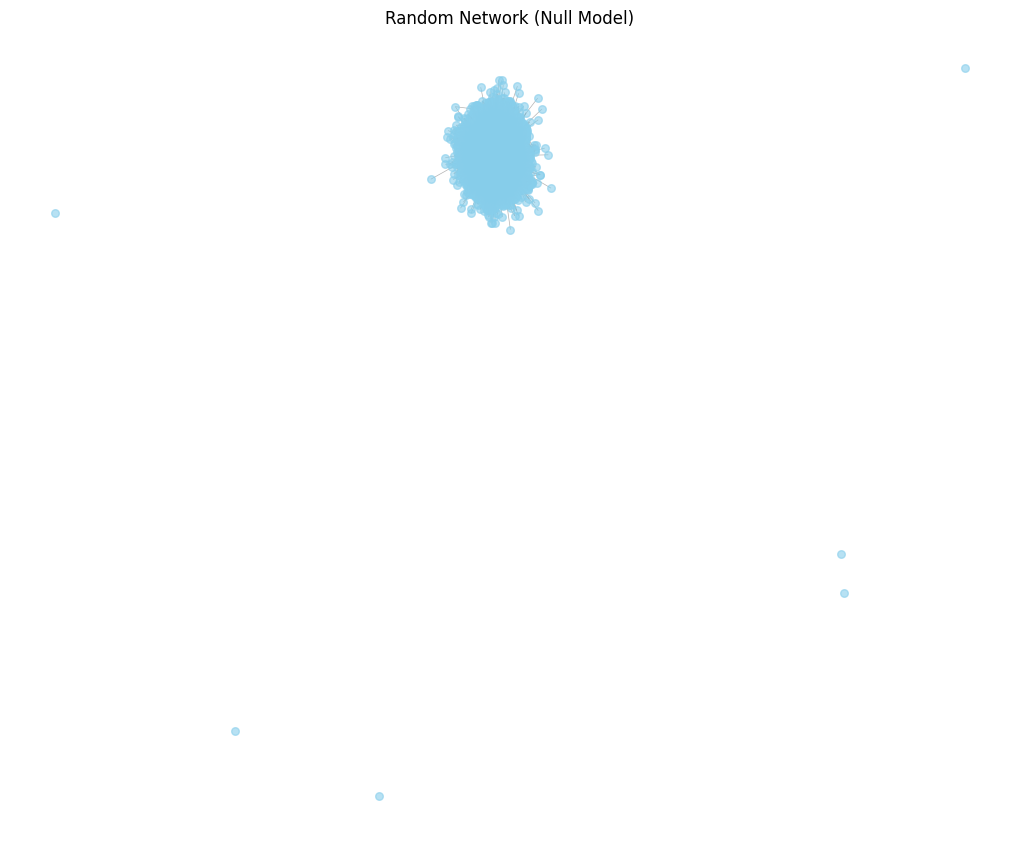

In [45]:
# Visualize the new network

def visualize_network(G):
    pos = nx.spring_layout(G, seed=333) 
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, node_size=30, node_color='skyblue', edge_color='gray', width=0.5, alpha=0.6, with_labels=False)
    plt.title("Random Network (Null Model)")
    plt.axis('off')
    plt.show()

visualize_network(G_random)

<span style="color:red">
Question: What regime does your random network fall into? Is it above or below the critical threshold? 
</span>

*Our k is larger than 1, and according to section 3.6 in the networksciencebook.com, that falls into the supercritical regime where $\langle k \rangle > 1$ and $p > 1/N$. Since the critical threshold is $\langle k \rangle = 1$, then it is above the critical threshold. When it is above the critical threshold, it means that the network probably contains a giant connected component, as a cluster that spans a significant part of the nodes, as seen in the visualization above.*

<span style="color:red">
Question: According to the textbook, what does the network's structure resemble in this regime?  
</span>

*As $\langle k \rangle$ expands beyond the critical point, the giant component grows, drawing in more nodes. However, we still se a lot of isolated components, forming a tree, while the giant component in the top contains loops and cycles. This is characterized by a nonlinear relationship relationship between the average defree and the size of the large compontent, specially when $\langle k \rangle$ becomes bigger.*


<span style="color:red">
Question: Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.
</span>

*The visualization of the random network above show a single giant component sourrounded by several small, disconnected clusters and isolatede nodes. This is exactly what theory predicts when talking about the supercritical regime. In contrast, actual networks would often show sommunity structure and clustering coefficients (friends are connected, and likely also friends of friends). This random generated network lacks these features, and shows a more structureless and random (funny enough) pattern.*


> 2. _Shortest Paths_: Here, we will check if the Computational Social Scientists Network exhibits characteristics of a small-world network by analyzing its shortest paths.
> * Begin by identifying the largest connected component within the Computational Social Scientists network. Recall that a connected component is a subset of nodes in which every pair of nodes is connected by a path. For a refresher on connected components, see section 2.9 of the Network Science book. Follow these steps:
>    - Utilize [``nx.algorithms.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to enumerate all connected components, which will be returned as a list of node subsets.
>    - Select the largest subset of nodes identified in the previous step. Then, create a subgraph of your original network that includes only these nodes, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This subset forms your largest connected component, sometimes referred to as the [giant component](https://en.wikipedia.org/wiki/Giant_component).
> * Calculate the average (unweighted) shortest path length within this giant component by employing [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html).
> * Perform the same calculation for the giant component of the random network you constructed in the above exercise 1.
> * Reflect on how the average shortest path lengths of the real and random networks compare and answer the following questions, supporting your answers with the theory from the book.
>   - Why do you think I asked you to consider the giant component only?
>   - Why do you think I asked you to consider unweighted edges?
>   - Does the Computational Social Scientists network exhibit the small-world phenomenon?




## Part 2 Network Analysis in Computational Social Science

These exercises are taken from Week 6: __Exercise 1: Mixing Patterns and Assortativity__ and __Exercise 3: Zachary's karate club__.

> __Exercise 1: Mixing Patterns and Assortativity__ 
>
> __Part 1: Assortativity Coefficient__ 
> 1. *Calculate the Assortativity Coefficient* for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in [this paper](https://arxiv.org/pdf/cond-mat/0209450.pdf) (equation 2, here for directed networks). **Do not use the NetworkX implementation.**
>


> __Part 2: Configuration model__
> In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model.  
>
> 2. *Implement the configuration model* using the _double edge swap_ algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:
>   - **a.** Create an exact copy of your original network.
>   - **b.** Select two edges, $e_{1} = (u,v)$ and $e_{2} = (x,y)$, ensuring *u != y* and *v != x*.
>   - **c.** Flip the direction of $e_{1}$ to $e_{1} = (v,u)$ 50% of the time. This ensure that your final results is not biased, in case your edges were sorted (they usually are). 
>   - **d.** Ensure that new edges $e_{1}' = (e_{1}[0],e_{2}[1])$ and $e_{2}' = (e_{2}[0],e_{1}[1])$ do not already exist in the network.
>   - **e.** Remove edges $e_{1}$ and $e_{2}$ and add edges $e_{1}'$ and $e_{2}'$.
>   - **f.** Repeat steps **b** to **e** until you have performed _E*10_ swaps, where E is the total number of edges.



> 3. *Double check that your algorithm works well*, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.
>
>


> __Part 3: Analyzing Assortativity in Random Networks__  
>
> 4. *Generate and analyze at least 100 random networks* using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.
>


> __Exercise 2: Zachary's karate club__: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function [karate_club_graph](https://networkx.org/documentation/stable//auto_examples/graph/plot_karate_club.html)

> 1. Visualize the graph. Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below.



> 2. Write a function to compute the __modularity__ of a graph partitioning (use **equation 9.12** in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.



> 3. Explain in your own words the concept of _modularity_.



> 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a [node attribute](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_node_attributes.html), called _"club"_.



> 5. Create $1000$ randomized version of the Karate Club network using the _double edge swap_ algorithm you wrote in the exercise above 5. For each of them, compute the modularity of the "club" split and store it in a list.



> 6. Compute the average and standard deviation of the modularity for the random network.



> 7. Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)).



> 8. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?



> 9.  Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?



> 10.  Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix **_D_** with dimension (2 times _A_), where _A_ is the number of communities found by Louvain. We set entry _D_(_i_,_j_) to be the number of nodes that community _i_ has in common with group split _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

## Part 3 - Words that characterize Computational Social Science communities

These exercises are taken from Week 8
> __Exercise 1: TF-IDF and the Computational Social Science communities.__ The goal for this exercise is to find the words charachterizing each of the communities of Computational Social Scientists.
> What you need for this exercise: 
>    * The assignment of each author to their network community, and the degree of each author (Week 6, Exercise 4). This can be stored in a dataframe or in two dictionaries, as you prefer.  
>    * the tokenized _abstract_ dataframe (Week 7, Exercise 2)
>
> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?



> 2. Now, we want to find out which words are important for each *community*, so we're going to create several ***large documents, one for each community***. Each document includes all the tokens of abstracts written by members of a given community. 
>   * Consider a community _c_
>   * Find all the abstracts of papers written by a member of community _c_.
>   * Create a long array that stores all the abstract tokens 
>   * Repeat for all the communities. 
> __Note:__ Here, to ensure your code is efficient, you shall exploit ``pandas`` builtin functions, such as [``groupby.apply``](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) or [``explode``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).



> 3. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the __top 5 communities__ (by number of authors). 
>   * Describe similarities and differences between the communities.
>   * Why aren't the TFs not necessarily a good description of the communities?
>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?



> 4. We're ready to calculate TF-IDF. Do that for the __top 9 communities__ (by number of authors). Then for each community: 
>   * List the 10 top TF words 
>   * List the 10 top TF-IDF words
>   * List the top 3 authors (by degree)
>   * Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?




 __Exercise 2: The Wordcloud__. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.
> * Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration). 
> * Comment on your results. What can you conclude on the different sub-communities in Computational Social Science? 
> * Look up online the top author in each community. In light of your search, do your results make sense?

 __Exercise 3: Computational Social Science__ 

> * Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science. 
> * In light of your data-driven analysis, has your understanding of the field changed? How? __(max 150 words)__